In [ ]:
#pip install nibabel

   ---------------------------------------- 0.0/3.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.3 MB 325.1 kB/s eta 0:00:11
    --------------------------------------- 0.1/3.3 MB 573.4 kB/s eta 0:00:06
   -- ------------------------------------- 0.2/3.3 MB 1.3 MB/s eta 0:00:03
   ---- ----------------------------------- 0.4/3.3 MB 1.7 MB/s eta 0:00:02
   ----------- ---------------------------- 0.9/3.3 MB 3.5 MB/s eta 0:00:01
   ----------------------------- ---------- 2.5/3.3 MB 7.5 MB/s eta 0:00:01
   ------------------------------------- -- 3.1/3.3 MB 8.2 MB/s eta 0:00:01
   ---------------------------------------- 3.3/3.3 MB 7.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

In [2]:
path_to_data = '../3702_left_knee.nii/3702_left_knee.nii'

In [3]:
ct_images_vol = nib.load(path_to_data)

In [4]:
#type of object
type(ct_images_vol)

nibabel.nifti1.Nifti1Image

In [5]:
print(ct_images_vol.header)
#dim             : [  3 512 512 216   1   1   1   1]
#dim[0] = 3: This is a 3D image volume.
#dim[1:4] = 512, 512, 216: Shape is (512, 512, 216) → Width × Height × Depth (Z-slices).
# Remaining values (1s) are placeholders for higher dimensions like time (not used here).

#pixdim          : [1.       0.869141 0.869141 2.       0.       0.       0.       0.      ]
# physical size of each voxel (in mm):
#### pixdim[1] = 0.869 mm → voxel width (X)
#### pixdim[2] = 0.869 mm → voxel height (Y)
#### pixdim[3] = 2.000 mm → voxel depth (Z)

#datatype        : int32 ; bitpix          : 32
# Voxel values are stored as 32-bit signed integers (int32). This matters when doing calculations or rescaling intensities.



<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512 216   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int32
bitpix          : 32
slice_start     : 0
pixdim          : [1.       0.869141 0.869141 2.       0.       0.       0.       0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 222.5
qoffset_y       : 222.5
qoffset_z       : -900.5
s

## Summary

Shape: (512, 512, 216) → 216 axial CT slices of 512×512 pixels

Voxel size: (0.869 × 0.869 × 2.0 mm³)

Datatype: 32-bit integer

Physical size of volume (approx.):

Width: 512 × 0.869 mm ≈ 445 mm

Height: 512 × 0.869 mm ≈ 445 mm

Depth: 216 × 2.0 mm = 432 mm



In [6]:
# Use nibabel to verify orientation
from nibabel.orientations import aff2axcodes

affine = ct_images_vol.affine
orientation = aff2axcodes(affine)
print("Orientation:", orientation)

# if Z corresponds to slice direction → you're in axial view.


Orientation: ('L', 'P', 'S')


In [7]:
ct_images_vol_data = ct_images_vol.get_fdata()
print(type(ct_images_vol_data)) # get_fdata() returned numpy.mmap which accesses files from disk instead of loading to ram
ct_images_vol_data = np.array(ct_images_vol_data) # load fully into ram for faster processing
print(type(ct_images_vol_data))


<class 'numpy.memmap'>
<class 'numpy.ndarray'>


In [8]:
print(f"shape of data: {ct_images_vol_data.shape}")

shape of data: (512, 512, 216)


# Visualize Slices

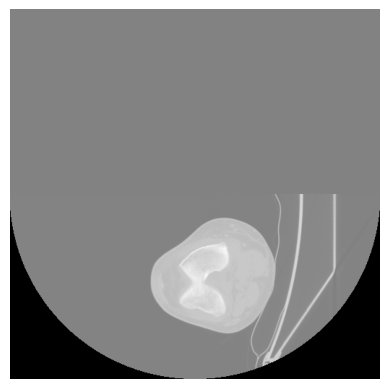

In [9]:
plt.imshow(ct_images_vol_data[:, :, 108], cmap="gray") #grab images along axial plane
plt.axis('off')
plt.show()

In [10]:
from ipywidgets import interact, fixed

def view_axial_slice(z, vol_data):
    plt.imshow(vol_data[:, :, z], cmap='gray')
    plt.axis('off')
    plt.title(f"Axial Slice {z}")
    plt.show()

interact(view_axial_slice, z=(0, ct_images_vol_data.shape[2] - 1), vol_data = fixed(ct_images_vol_data))

interactive(children=(IntSlider(value=107, description='z', max=215), Output()), _dom_classes=('widget-interac…

<function __main__.view_axial_slice(z, vol_data)>

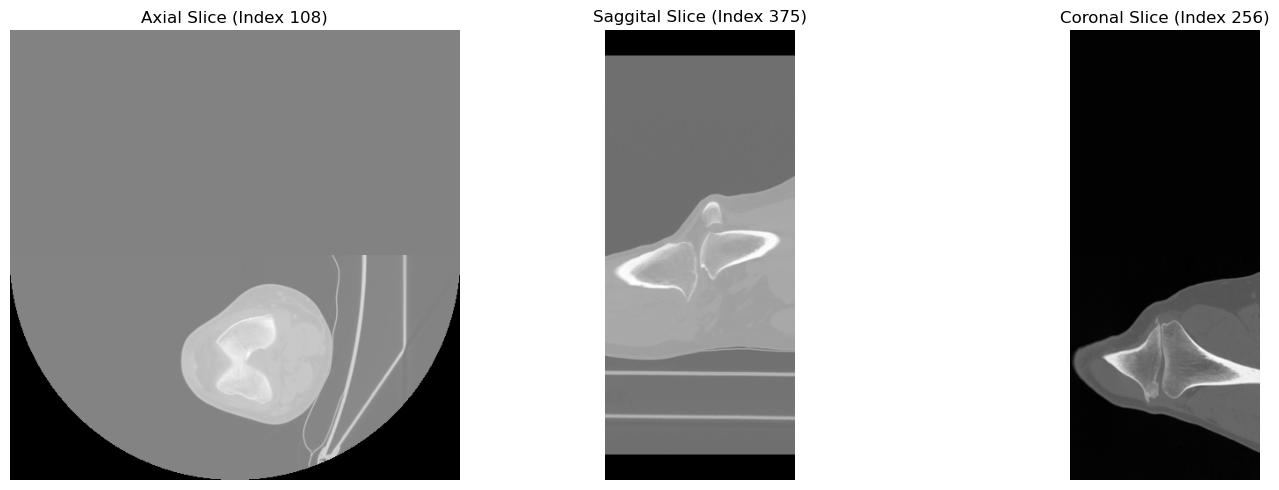

In [16]:
def plot_slices(data):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Axial slice 
    axes[0].imshow(data[:, :, 108], cmap='gray')
    axes[0].set_title('Axial Slice (Index 108)')
    axes[0].axis('off')

    # Coronal slice
    axes[1].imshow(data[375, :, :], cmap='gray')
    axes[1].set_title('Saggital Slice (Index 375)')
    axes[1].axis('off')
    # Sagittal slice
    axes[2].imshow(data[:, 256, :], cmap='gray')
    axes[2].set_title('Coronal Slice (Index 256)')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

plot_slices(ct_images_vol_data)

In [17]:
def view_coronal_slice(y, vol_data):
    plt.imshow(vol_data[:,y, :], cmap='gray')
    plt.axis('off')
    plt.title(f"Coronal Slice {y}")
    plt.show()

interact(view_coronal_slice, y=(0, ct_images_vol_data.shape[1] - 1), vol_data = fixed(ct_images_vol_data))

interactive(children=(IntSlider(value=255, description='y', max=511), Output()), _dom_classes=('widget-interac…

<function __main__.view_coronal_slice(y, vol_data)>

In [18]:
def view_saggital_slice(x, vol_data):
    plt.imshow(vol_data[x,:, :], cmap='gray')
    plt.axis('off')
    plt.title(f"Saggital Slice {x}")
    plt.show()

interact(view_saggital_slice, x=(0, ct_images_vol_data.shape[0] - 1), vol_data = fixed(ct_images_vol_data))

interactive(children=(IntSlider(value=255, description='x', max=511), Output()), _dom_classes=('widget-interac…

<function __main__.view_saggital_slice(x, vol_data)>

(array([6.0233760e+06, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        4.5469923e+07, 3.5547000e+05, 4.5239660e+06, 1.4333500e+05,
        3.8718000e+04, 6.8316000e+04]),
 array([-3024. , -2544.7, -2065.4, -1586.1, -1106.8,  -627.5,  -148.2,
          331.1,   810.4,  1289.7,  1769. ]),
 <BarContainer object of 10 artists>)

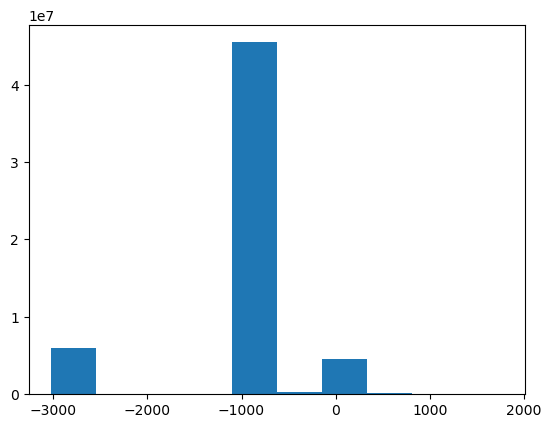

In [19]:
plt.hist(ct_images_vol_data.flatten())

In [20]:
np.min(ct_images_vol_data), np.max(ct_images_vol_data)

(-3024.0, 1769.0)

Huge spike at ~–1000 HU: air

Moderate peak around 0 to 100 HU: Soft tissue, fat and muscle. Most tissues fall within –100 to +200 HU.

Very small tail going toward 1000 : Bone

Left tail near –3000 : Possibly artifact



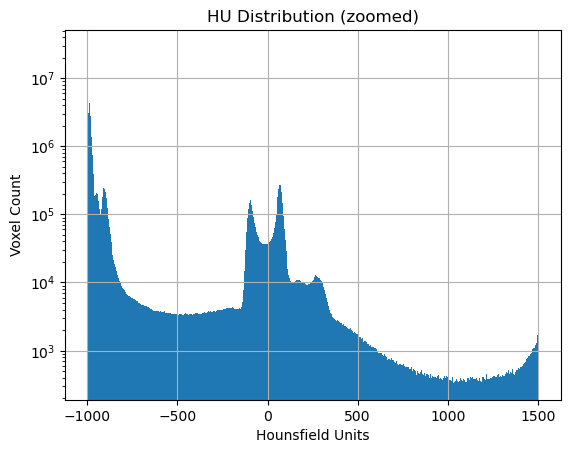

In [21]:
plt.hist(ct_images_vol_data.flatten(), bins=500, range=(-1000, 1500), log=True)
plt.title("HU Distribution (zoomed)")
plt.xlabel("Hounsfield Units")
plt.ylabel("Voxel Count")
plt.grid(True)
plt.show()


## Threshold to Isolate Bone

Thresholding isolates bone from surrounding soft tissue and air.

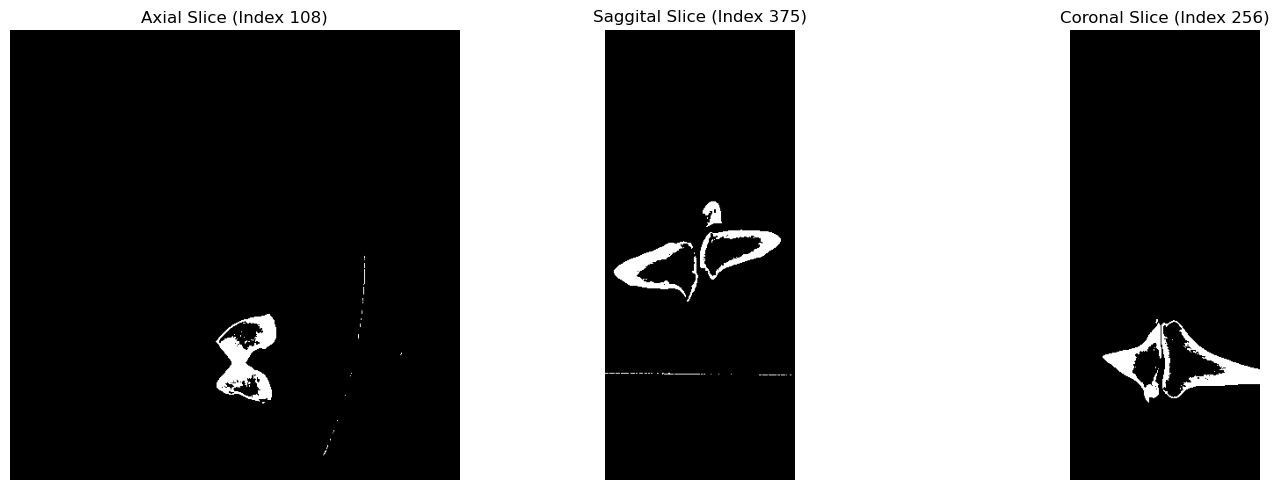

In [141]:
bone_mask = (ct_images_vol_data > 300)
plot_slices(bone_mask)

In [137]:
from scipy.ndimage import binary_closing, binary_fill_holes
import numpy as np

# Start with your raw mask (from thresholding, maybe cleaned a bit)
raw_mask = (ct_images_vol_data > 300)

# Apply closing to bridge small black gaps inside bone
closed = binary_closing(raw_mask, structure=np.ones((3, 3, 3)), iterations=1)

# Fill any internal holes (now that they're enclosed)
filled = binary_fill_holes(closed)

# Keep only parts that originally belonged to the bone
final_mask = filled | raw_mask  # OR: filled & raw_mask (if you want to stay even closer to original)



In [118]:
from skimage.morphology import remove_small_objects

cleaned_mask = remove_small_objects(bone_mask, min_size=500) #remove all small fragments below a voxel count threshold (e.g. < 500 voxels):

In [120]:
labeled_mask = measure.label(cleaned_mask)

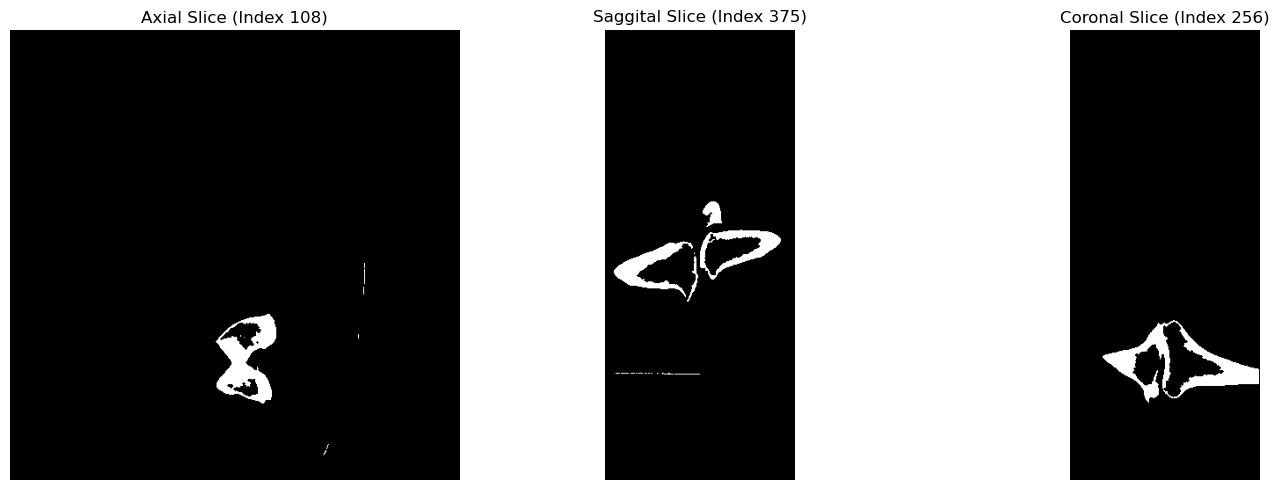

In [121]:
import numpy as np
from scipy.ndimage import binary_fill_holes, binary_closing, generate_binary_structure

structure = generate_binary_structure(3, 2)  # 18-neighbor

final_mask = np.zeros_like(bone_mask)

for label_id in range(1, labeled_mask.max() + 1):
    single_bone = (labeled_mask == label_id)
    
    # Fill internal holes only inside this bone
    filled = binary_fill_holes(single_bone, structure=structure)

    # Optional: small closing (won't leak into nearby bone)
    closed = binary_closing(filled, structure=structure, iterations=1)

    final_mask[closed] = 1

plot_slices(final_mask)

In [113]:
filled_mask = binary_fill_holes(cleaned_mask).astype(np.uint8)

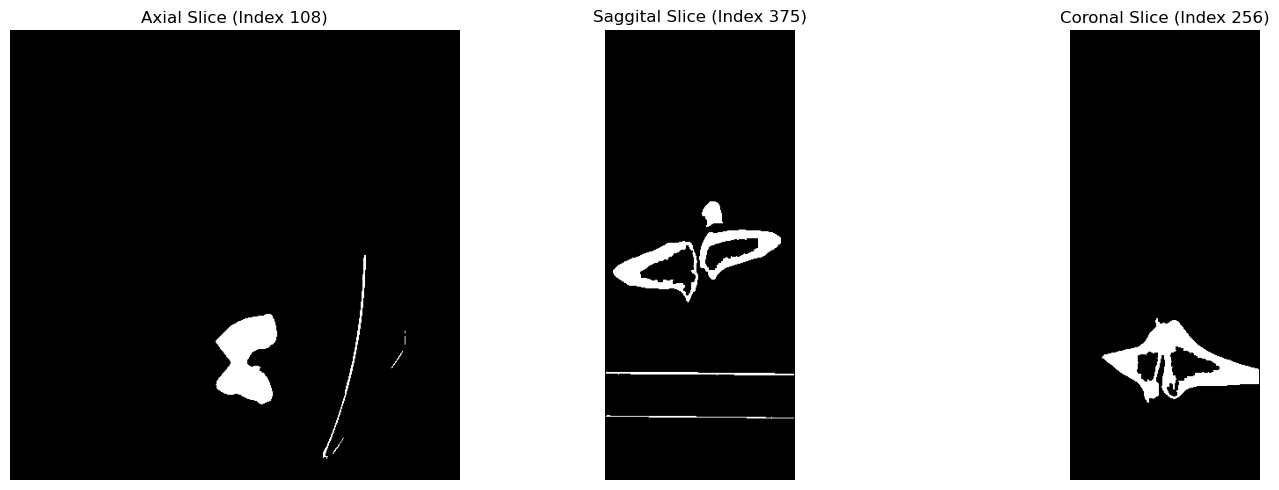

In [99]:
plot_slices(filled_mask)

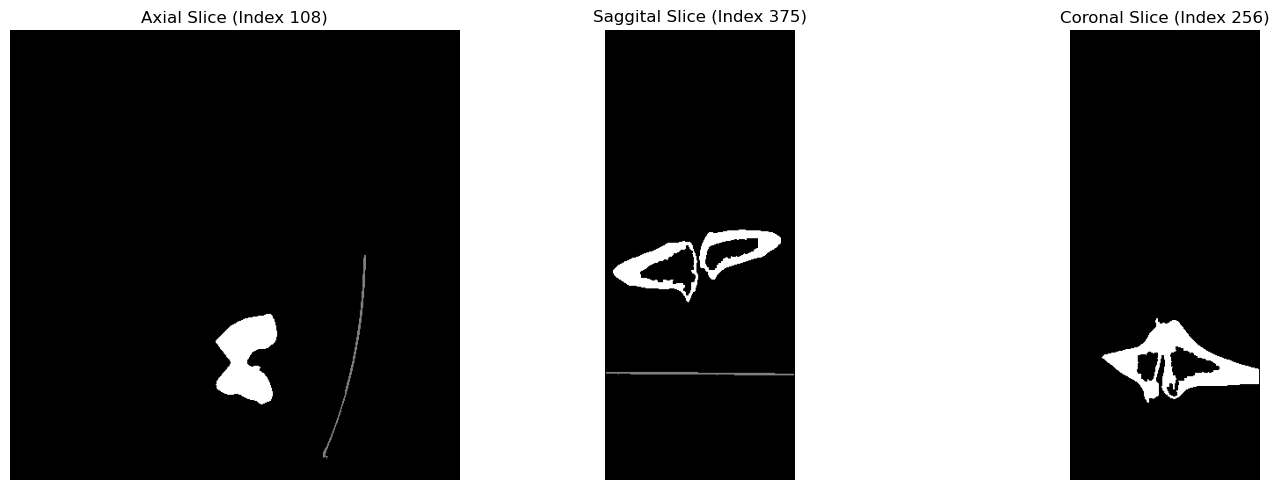

In [103]:
from skimage import measure
from scipy.ndimage import binary_fill_holes
from skimage.morphology import ball, binary_closing

labels = measure.label(filled_mask, connectivity=1)  # label the cleaned binary mask

props = measure.regionprops(labels) # get properties of each region


# Keep the two largest objects
areas = [p.area for p in props]
keep_labels = np.argsort(areas)[-2:]  # change 2 if more bones expected
top_labels = [props[i].label for i in keep_labels]

# Get centroids of the two largest components
c1 = props[keep_labels[0]].centroid
c2 = props[keep_labels[1]].centroid

# Decide which label is femur (higher = smaller row)
if c1[0] < c2[0]:
    femur_label = top_labels[0]
    tibia_label = top_labels[1]
else:
    femur_label = top_labels[1]
    tibia_label = top_labels[0]

femur_mask = (labels == femur_label)
tibia_mask = (labels == tibia_label)

# Apply closing + hole filling to each separately
# femur_filled = binary_fill_holes(femur_mask)
# tibia_filled = binary_fill_holes(tibia_mask)

# # Combine into final multi-label mask
# final_mask = np.zeros_like(labels, dtype=np.uint8)
# final_mask[femur_filled] = 1
# final_mask[tibia_filled] = 2

final_mask = np.zeros_like(labels, dtype=np.uint8) # Initialize an empty mask
final_mask[femur_mask] = 1 # assign label 1 to the first component 
final_mask[tibia_mask] = 2 # assign label 2 to the second component 


# mask_cleaned = np.isin(labels, [femur_label, tibia_label])

plot_slices(final_mask)


In [104]:
new_img = nib.Nifti1Image(final_mask, ct_images_vol.affine, ct_images_vol.header)
nib.save(new_img, 'femur_tibia_segmentation_3.nii')

In [33]:
print("Unique labels in the volume:", np.unique(labels))
for i, p in enumerate(props):
    print(f"Label: {p.label}, Area: {p.area}")


Unique labels in the volume: [ 0  1  2  3  4  5  6  7  8  9 10]
Label: 1, Area: 3987.0
Label: 2, Area: 1379.0
Label: 3, Area: 4347.0
Label: 4, Area: 1024.0
Label: 5, Area: 241156.0
Label: 6, Area: 13462.0
Label: 7, Area: 1112.0
Label: 8, Area: 14680.0
Label: 9, Area: 5228.0
Label: 10, Area: 1129.0


In [158]:
from scipy.ndimage import label
labeled_mask, _ = label(bone_mask)


In [159]:
from skimage.measure import regionprops
import numpy as np

regions = regionprops(labeled_mask)
regions = sorted(regions, key=lambda r: r.area, reverse=True)

# Get top 2 labels
if len(regions) < 2:
    raise ValueError("Less than 2 large components found.")

label1 = regions[0].label
label2 = regions[1].label

# Create mask with only these two
filtered_mask = np.logical_or(labeled_mask == label1, labeled_mask == label2).astype(np.uint8)


In [160]:
c1 = regions[0].centroid
c2 = regions[1].centroid

femur_label, tibia_label = (label1, label2) if c1[0] < c2[0] else (label2, label1)

final_mask = np.zeros_like(filtered_mask, dtype=np.uint8)
final_mask[labeled_mask == femur_label] = 1
final_mask[labeled_mask == tibia_label] = 2

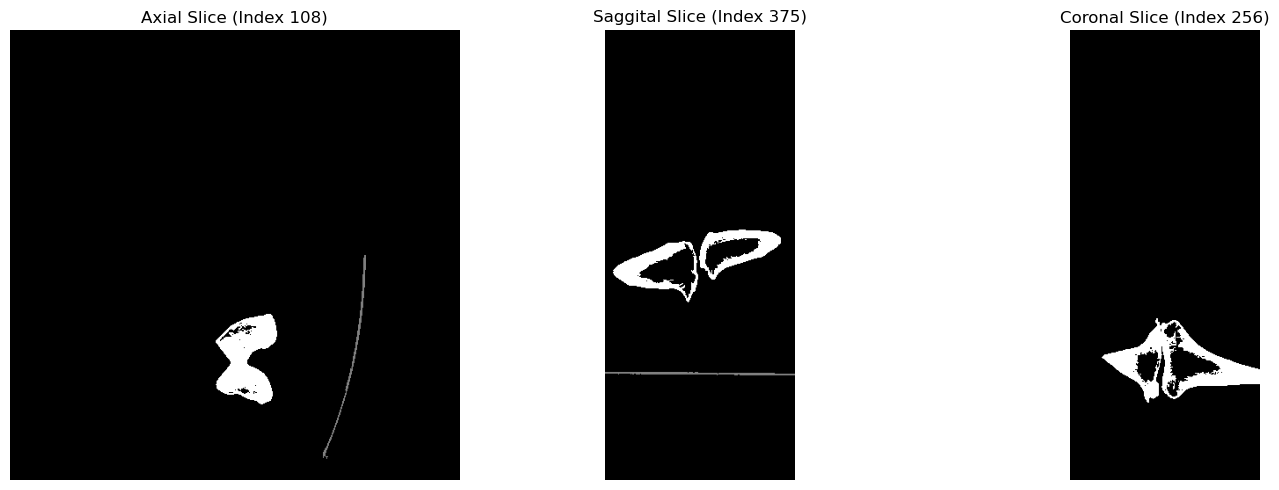

In [161]:
plot_slices(final_mask)

In [ ]:
interact(view_axial_slice, z=(0, ct_images_vol_data.shape[2] - 1), vol_data = fixed(bone_mask))

interactive(children=(IntSlider(value=107, description='z', max=215), Output()), _dom_classes=('widget-interac…

<function __main__.view_axial_slice(z, vol_data)>

In [143]:
interact(view_saggital_slice, x=(0, ct_images_vol_data.shape[1] - 1), vol_data = fixed(bone_mask))

interactive(children=(IntSlider(value=255, description='x', max=511), Output()), _dom_classes=('widget-interac…

<function __main__.view_saggital_slice(x, vol_data)>

In [ ]:
interact(view_coronal_slice, y=(0, ct_images_vol_data.shape[0] - 1), vol_data = fixed(bone_mask))

interactive(children=(IntSlider(value=255, description='y', max=511), Output()), _dom_classes=('widget-interac…

<function __main__.view_coronal_slice(y, vol_data)>

In [23]:
from scipy.ndimage import label
labeled_mask, _ = label(bone_mask)

In [24]:
from skimage.measure import regionprops
import numpy as np

# Label all connected components

regions = regionprops(labeled_mask)

# Sort regions by size
regions = sorted(regions, key=lambda r: r.area, reverse=True)

# Get the labels of the two largest regions
label1 = regions[0].label
label2 = regions[1].label

# Get centroids to distinguish femur vs tibia
c1, c2 = regions[0].centroid, regions[1].centroid
femur_label, tibia_label = (label1, label2) if c1[0] < c2[0] else (label2, label1)

# Assign multi-label mask
final_mask = np.zeros_like(bone_mask, dtype=np.uint8)
final_mask[labeled_mask == femur_label] = 1
final_mask[labeled_mask == tibia_label] = 2


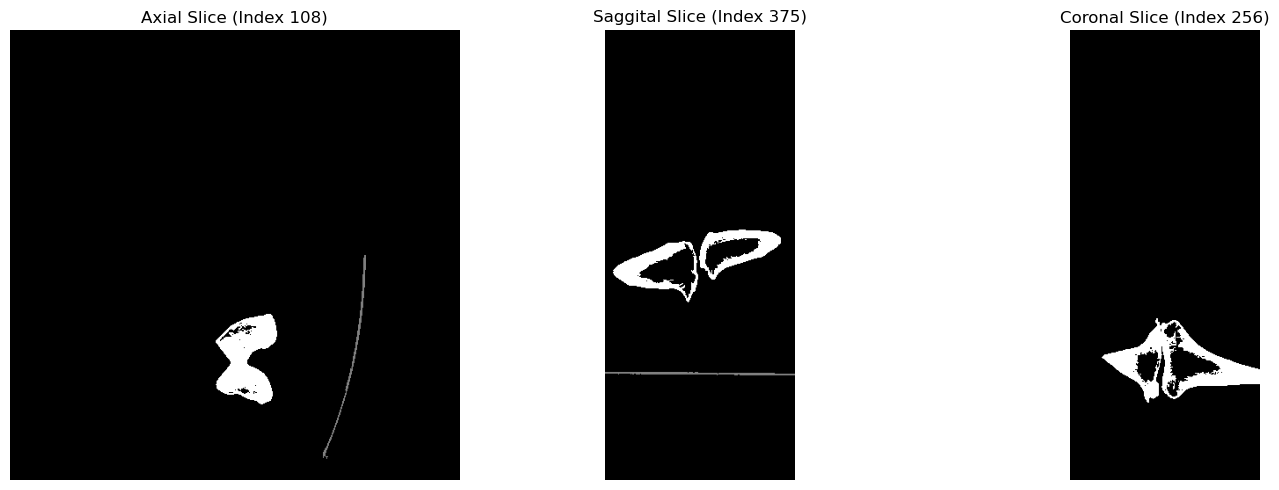

In [25]:
plot_slices(final_mask)

In [26]:
import scipy.ndimage as ndi

# Label connected components
labeled_mask, num_labels = ndi.label(bone_mask)

# Measure size of each component
sizes = ndi.sum(bone_mask, labeled_mask, range(num_labels + 1))

# Get labels of the two largest components
largest_labels = np.argsort(sizes)[-2:]  # assuming femur & tibia are the two biggest


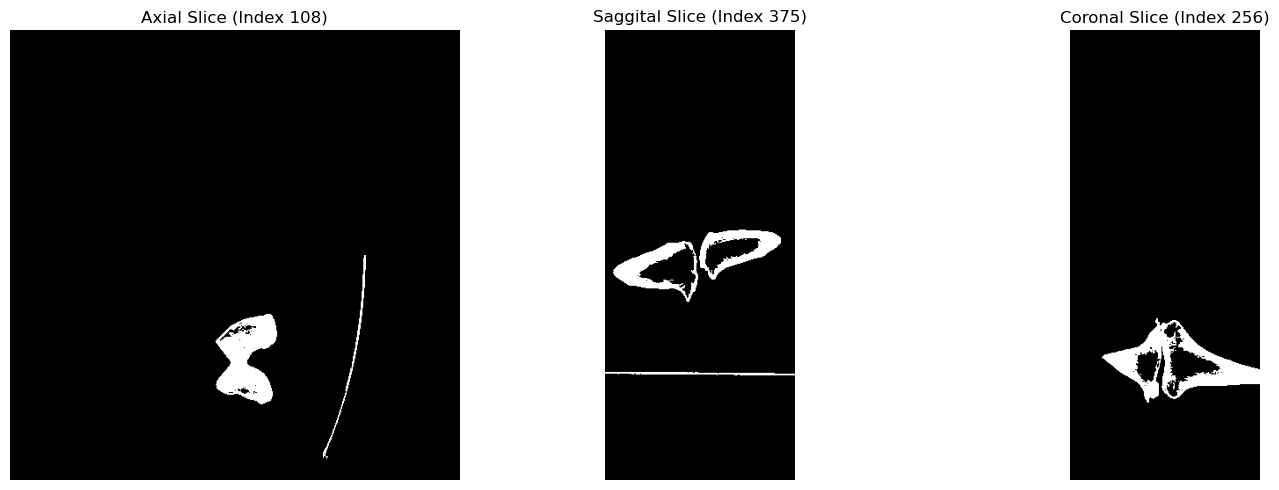

In [27]:
# Create mask with only femur and tibia
final_mask = np.isin(labeled_mask, largest_labels).astype(np.uint8)

plot_slices(final_mask)

In [28]:
interact(view_axial_slice, z=(0, ct_images_vol_data.shape[2] - 1), vol_data = fixed(final_mask))

interactive(children=(IntSlider(value=107, description='z', max=215), Output()), _dom_classes=('widget-interac…

<function __main__.view_axial_slice(z, vol_data)>

In [ ]:
interact(view_saggital_slice, x=(0, ct_images_vol_data.shape[1] - 1), vol_data = fixed(final_mask))

interactive(children=(IntSlider(value=255, description='x', max=511), Output()), _dom_classes=('widget-interac…

<function __main__.view_saggital_slice(x, vol_data)>

In [30]:
interact(view_coronal_slice, y=(0, ct_images_vol_data.shape[0] - 1), vol_data = fixed(final_mask))

interactive(children=(IntSlider(value=255, description='y', max=511), Output()), _dom_classes=('widget-interac…

<function __main__.view_coronal_slice(y, vol_data)>